In [1]:
# Modeling a simple electric motor's power-speed-torque characteristic in Python

# 1 - Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# 2 - Define the motor's power-speed-torque relationship. You can choose a mathematical equation or use empirical data to model this relationship. For example, let's assume a linear relationship between power (P), speed (N), and torque (T):
# Motor Parameters:
# TM4 SUMA MD MV2500-6P
# Peak Power: 230 kW
# Peak Torque: 2500 Nm
# Max Speed: 3000 rpm
# Nominal Power: 115 kW
# Nominal Torque: 1140 Nm
# Nominal Speed: 1000 rpm
# @3000 rpm, T = 366 Nm
def motor_characteristic(N):
    
    T = np.zeros(3000)
    P = np.zeros(3000)

    mask = (N > 1000) & (N <= 3000)
    mask2 = (N >= 0) & (N <= 1000)
    T[mask] = 1140 - 0.387 * (N[mask]-1000)
    P[mask] = 2 * np.pi * N[mask] * T[mask] / 60
    T[mask2] = 1140
    # Calculate power
    P = 2 * np.pi * N * T / 60
    
    return P, T

In [3]:
from numpy import linspace

N = 2000
T = np.zeros(3000)
#T

T[1001:3000] = 1140 - 0.387 * (N-1000)
T[0:1000] = 1140
print(T)

[1140. 1140. 1140. ...  753.  753.  753.]


In [8]:
# 3 - Generate speed values for the desired range
speed_range = np.linspace(0, 3000, 3000)  # Speed range in RPM
#speed_range = 0:3000:100  # Speed range in RPM
# speed_range = np.arange(0, 3000, 100).any()  # Speed range in RPM
# speed_range

In [9]:
# 4 - Calculate power and torque for each speed value using the motor_characteristic function:
power_values, torque_values = motor_characteristic(speed_range)

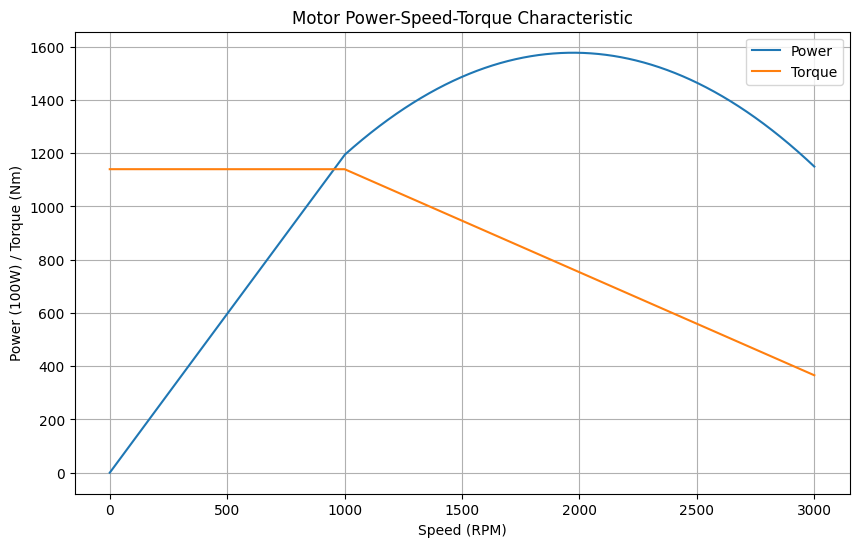

In [10]:
# 5 - Plot the power-speed and torque-speed characteristics:
plt.figure(figsize=(10, 6))
plt.plot(speed_range, power_values/100, label='Power')
plt.plot(speed_range, torque_values, label='Torque')
plt.xlabel('Speed (RPM)')
plt.ylabel('Power (100W) / Torque (Nm)')
plt.legend()
plt.grid(True)
plt.title('Motor Power-Speed-Torque Characteristic')
plt.show()


In [13]:
power_values, torque_values = motor_characteristic(1000)
# 5 - Plot the power-speed and torque-speed characteristics:
plt.figure(figsize=(10, 6))
plt.plot(speed_range, power_values/100, label='Power')
plt.plot(speed_range, torque_values, label='Torque')
plt.xlabel('Speed (RPM)')
plt.ylabel('Power (100W) / Torque (Nm)')
plt.legend()
plt.grid(True)
plt.title('Motor Power-Speed-Torque Characteristic')
plt.show()

TypeError: 'int' object is not subscriptable